Bacis Ensemble Technique

Dataset : Breast Cancer Dataset

Models :  Regression Model


        1. Gradient Boosting Machine (GBM) <br>
        2. Extreme Gradient Boosting Machine (XGBM)<br>
        3. LightGBM<br>
        4. CatBoost<br>
        5. Ada Boosting

In [ ]:
import sklearn
from sklearn.datasets import load_diabetes
dataset=load_diabetes()

In [ ]:
print(dataset.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Intro to EDA

In [ ]:
import numpy as np
X=np.asarray(dataset.data)
Y=np.asarray(dataset.target)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
def metrics(y_true,y_pred):

  from sklearn.metrics import explained_variance_score
  from sklearn.metrics import max_error
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import mean_squared_error

  from sklearn.metrics import median_absolute_error
  from sklearn.metrics import r2_score
  
  variance=explained_variance_score(y_true, y_pred)
  max_err=max_error(y_true, y_pred)
  mae=mean_absolute_error(y_true, y_pred)
  mse=mean_squared_error(y_true, y_pred)

  medae=median_absolute_error(y_true, y_pred)
  r=r2_score(y_true, y_pred)

  metrices={"variance":variance,
            "max_err":max_err,
            "mae":mae,
            "mse":mse,
            "medae":medae,
            "r_score":r}
               
  return metrices

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GradBoost=GradientBoostingRegressor(n_estimators=200,learning_rate=0.75,min_samples_leaf=5,max_depth=4)
GradBoost.fit(X_train,Y_train)
GradBoost_prediction=GradBoost.predict(X_test)
metrices_grad=metrics(Y_test,GradBoost_prediction)
metrices_grad

{'mae': 47.686123224560454,
 'mape': 'NULL',
 'max_err': 138.27603413781566,
 'medae': 42.28218686137201,
 'mse': 3507.7538671613197,
 'msle': 0.2242694922977384,
 'r_score': 0.3379287657920642,
 'variance': 0.3417603014526861}

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
AdaBoost=AdaBoostRegressor(n_estimators=200,learning_rate=0.75)
AdaBoost.fit(X_train,Y_train)
AdaBoost.predict(X_test)
metrices_ada=metrics(Y_test,AdaBoost.predict(X_test))
metrices_ada

{'mae': 44.15929652889874,
 'mape': 'NULL',
 'max_err': 148.03305785123968,
 'medae': 44.571428571428584,
 'mse': 2877.8305500516126,
 'msle': 0.18550529302185192,
 'r_score': 0.45682368368226534,
 'variance': 0.46318436064300805}

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
Xgb=XGBRegressor(max_depth=5,learning_rate=0.75,n_estimators=150)
Xgb.fit(X_train,Y_train)
Xgb_prediction=Xgb.predict(X_test)

[18:31:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
metrices_xgb=metrics(Y_test,Xgb_prediction)
metrices_xgb

{'mae': 50.893697995818066,
 'max_err': 207.8892059326172,
 'medae': 42.98393249511719,
 'mse': 4118.804267044004,
 'r_score': 0.2225960179043186,
 'variance': 0.24466213077446453}

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor
lgb=LGBMRegressor(max_depth=2,learning_rate=0.55,n_estimators=150)
lgb.fit(X_train,Y_train)
lgb_prediction=lgb.predict(X_test)

In [ ]:
metrices_lgb=metrics(Y_test,lgb_prediction)
metrices_lgb

{'mae': 43.43397081436216,
 'max_err': 148.48023044063947,
 'medae': 38.065219387276755,
 'mse': 3061.6031675036215,
 'r_score': 0.4221375089226499,
 'variance': 0.4231251964777327}

In [ ]:
!pip install catboost

     |████████████████████████████████| 65.8MB 54kB/s 


In [ ]:
from catboost import CatBoostRegressor,Pool
cb=CatBoostRegressor(max_depth=5,learning_rate=0.75,n_estimators=150)
pool=Pool(X_train,Y_train)
cb.fit(pool)
#cb.fit(X_train,Y_train)
cb_prediction=cb.predict(X_test)

0:	learn: 60.0209787	total: 46.9ms	remaining: 6.98s
1:	learn: 53.7072803	total: 48ms	remaining: 3.55s
2:	learn: 51.0091655	total: 48.9ms	remaining: 2.39s
3:	learn: 49.0761697	total: 49.7ms	remaining: 1.81s
4:	learn: 48.1576802	total: 50.5ms	remaining: 1.46s
5:	learn: 47.3706562	total: 51.3ms	remaining: 1.23s
6:	learn: 46.0491821	total: 52.1ms	remaining: 1.06s
7:	learn: 44.7602789	total: 53ms	remaining: 941ms
8:	learn: 44.1123020	total: 53.9ms	remaining: 844ms
9:	learn: 41.3714879	total: 54.7ms	remaining: 766ms
10:	learn: 39.9856207	total: 55.6ms	remaining: 702ms
11:	learn: 38.6583818	total: 56.5ms	remaining: 650ms
12:	learn: 38.3989766	total: 57.3ms	remaining: 604ms
13:	learn: 35.7589112	total: 58.1ms	remaining: 565ms
14:	learn: 34.7413911	total: 59ms	remaining: 531ms
15:	learn: 33.5043025	total: 59.8ms	remaining: 501ms
16:	learn: 32.3473848	total: 60.6ms	remaining: 474ms
17:	learn: 31.8757507	total: 61.5ms	remaining: 451ms
18:	learn: 31.4995796	total: 62.3ms	remaining: 430ms
19:	learn

In [ ]:
metrices_cat=metrics(Y_test,cb_prediction)
metrices_cat

{'mae': 48.43675431626418,
 'max_err': 176.62897004547307,
 'medae': 36.33278299427815,
 'mse': 3916.090561021619,
 'r_score': 0.26085722967107117,
 'variance': 0.27042972520819697}

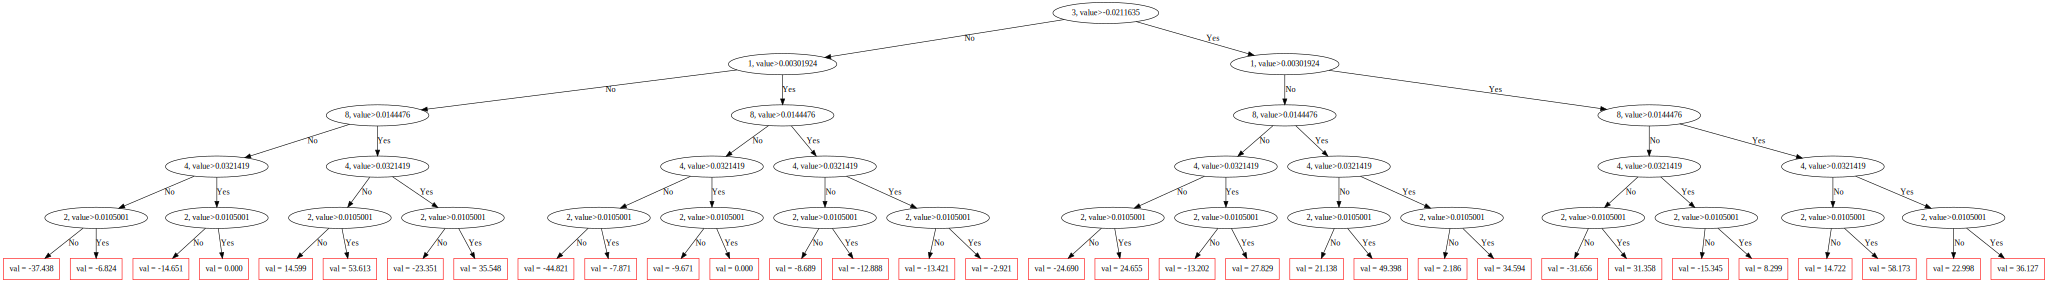

In [ ]:
cb.plot_tree(tree_idx=0,pool=pool)